In [44]:
%pylab

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


    with this way of solving, we can have a fourier number bigger and our solution stays stable.

In [50]:
from scipy.linalg import solve_banded
from scipy.special import erf

#create temperature array
ntimes = 1000000 # nombre de pas de temps
nx = 100 # nombre de nodes
Fo = 0.5
T = zeros([ntimes,nx]) # creates an matrix de zero
T[0,:] = 1. # first line 
T_top = 0. # boundaries
T_bottom = 1. # boundaries

##create matrix A, banded matrix
################################
# (-2 is because we don't want to make the calculation on the boundaries)
    # first line
A_upper = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_upper[0] = 0. # transform the first value in 0
    # second line
A_mid = (1.+Fo)*ones(nx-2) # vector of 3 values the same
    # third line
A_lower = (-Fo/2)*ones(nx-2) # vector of 3 values the same
A_lower[-1] = 0. # transform the last value in 0
    # creation of the matrice with the 3 vectores
A = vstack((A_upper,A_mid,A_lower))

## Writing the 3 equations
##########################
for n in arange(ntimes-1):
    # 
    b = array(T[n,1:-1]) + (Fo/2)*array(T[n,2:]) - Fo*array(T[n,1:-1]) + (Fo/2)*array(T[n,:-2])
    temp = array(T[n,1:-1]) # to just have the internal nodes
    b[0] = temp[0] + (Fo/2)*temp[1] - (Fo)*temp[0]+ (Fo/2)*T_top + (Fo/2)*T_top # += is like b[0]=b[0]+...
    b[-1] = temp[-1] + (Fo/2)*T_bottom - (Fo)*temp[-1] + (Fo/2)*temp[-2] + (Fo/2)*T_bottom
    
    T[n+1,1:-1] = solve_banded((1,1),A,b) # how many upperband, how many lowerband, A, b
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom
#create matrix b

In [ ]:
figure()
for n in arange(ntimes-1):
    plot(T[n,:])
T50 = erf(sqrt(arange(nx)**2/(4*50*Fo))) # this is the analytical solution
plot(T50, 'k--')
plot(arange(nx), erf(0.5*(sqrt(arange(nx)**2./(Fo*99)))), '--',lw=3)

In [39]:
#Implicit solution
from scipy.linalg import solve_banded
ntimes = 100
nx = 1000
Fo = 2
A_upper = -Fo*ones(nx-2)
A_mid = (1.+2.*Fo)*ones(nx-2)
A_lower = -Fo*ones(nx-2)
A_upper[0] = 0.
A_lower[-1] = 0.
T = zeros([ntimes,nx])
T[0,:]=1.
T_top = 0.
T_bottom = 1.
A = vstack((A_upper, A_mid, A_lower))
for n in arange(ntimes-1):
    b = array(T[n,1:-1])
    b[0] += Fo*T_top
    b[-1] += Fo*T_bottom
    T[n+1,1:-1] = solve_banded((1,1), A, b)
    T[n+1,0] = T_top
    T[n+1,-1] = T_bottom

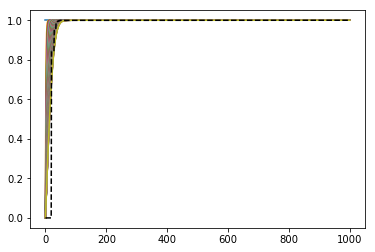

In [40]:
figure()
for n in arange(ntimes-1):
    plot(T[n,:])
T50 = erf(sqrt(arange(nx)**2/(4*50*Fo))) # this is the analytical solution
plot(T50, 'k--')